To training this model, I use data from [this link](https://oluk.users.earthengine.app/view/spl-investigator). The data that i use is the initial point of sea surface temperature (SST).

# Loading and Preprocessing the Data

In [ ]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load FB Prophet
import fbprophet
from fbprophet import Prophet

In [ ]:
dir(fbprophet)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv("/content/ee-chart.csv")

In [ ]:
df.head()

,system:time_start,sst
0,"Jan 1, 2017",NaN
1,"Jan 2, 2017",NaN
2,"Jan 3, 2017",NaN
3,"Jan 4, 2017",NaN
4,"Jan 5, 2017",NaN


In [ ]:
# stationary
# yt = yt -y(t-1)
df['production'] = df['production'] - df['production'].shift(1)

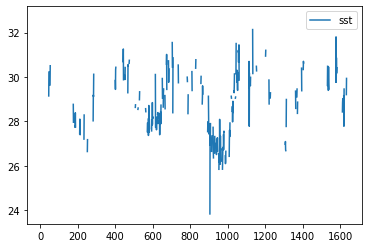

In [ ]:
df.plot()

In [ ]:
spl = df.dropna()

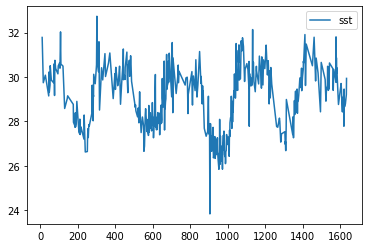

In [ ]:
spl.plot()

# Data Understanding

In [ ]:
df.describe()

,sst
count,452.000000
mean,28.967400
std,1.421491
min,23.830000
25%,27.866250
50%,29.105000
75%,30.062500
max,32.735000


In [ ]:
spl.describe()

,sst
count,452.000000
mean,28.967400
std,1.421491
min,23.830000
25%,27.866250
50%,29.105000
75%,30.062500
max,32.735000


In [ ]:
# Initialize the Model
model = Prophet()

In [ ]:
# Features of Prophet
dir(Prophet)

In [ ]:
spl.columnsm

Index(['system:time_start', 'sst'], dtype='object')

In [ ]:
spl.to_csv(index=False)

Parameters
+ growth: linear/logistic
+ seasonality: additive/multiplicative
+ holidays
+ changepoint

In [ ]:
# Works with a ds and y column names
spl.rename(columns={'system:time_start':'ds','sst':'y'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
spl.head()

,ds,y
10,"Jan 11, 2017",31.780
16,"Jan 17, 2017",29.740
27,"Jan 28, 2017",30.080
45,"Feb 15, 2017",29.145
46,"Feb 16, 2017",30.220


In [ ]:
spl = spl[1:]

In [ ]:
spl.head()

,ds,y
16,"Jan 17, 2017",29.740
27,"Jan 28, 2017",30.080
45,"Feb 15, 2017",29.145
46,"Feb 16, 2017",30.220
48,"Feb 18, 2017",29.320


In [ ]:
model = Prophet()

In [ ]:
# Fit Model to Data
model.fit(spl)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Shape of Dataset
spl.shape

(451, 2)

In [ ]:
# Create Future Dates
future_dates = model.make_future_dataframe(periods=12, freq = 'm')

In [ ]:
# Shape after adding 365 days
future_dates.shape

(463, 1)

In [ ]:
future_dates.head()

,ds
0,2017-01-17
1,2017-01-28
2,2017-02-15
3,2017-02-16
4,2017-02-18


In [ ]:
# Make Prediction with Model
prediction = model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-17,29.425881,29.123722,30.833324,29.425881,29.425881,0.565212,0.565212,0.565212,-0.175532,-0.175532,-0.175532,0.740744,0.740744,0.740744,0.0,0.0,0.0,29.991093
1,2017-01-28,29.424262,29.148975,30.846039,29.424262,29.424262,0.559606,0.559606,0.559606,0.003872,0.003872,0.003872,0.555734,0.555734,0.555734,0.0,0.0,0.0,29.983869
2,2017-02-15,29.421613,29.375536,31.110115,29.421613,29.421613,0.811877,0.811877,0.811877,0.048623,0.048623,0.048623,0.763254,0.763254,0.763254,0.0,0.0,0.0,30.233490
3,2017-02-16,29.421466,29.237086,30.950794,29.421466,29.421466,0.705844,0.705844,0.705844,-0.041570,-0.041570,-0.041570,0.747414,0.747414,0.747414,0.0,0.0,0.0,30.127310
4,2017-02-18,29.421172,29.272549,30.967891,29.421172,29.421172,0.707702,0.707702,0.707702,0.003872,0.003872,0.003872,0.703830,0.703830,0.703830,0.0,0.0,0.0,30.128873


In [ ]:
prediction.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
451,2021-06-30,29.569264,27.408512,29.077664,29.569264,29.569264,-1.333741,-1.333741,-1.333741,0.048623,0.048623,0.048623,-1.382363,-1.382363,-1.382363,0.0,0.0,0.0,28.235523
452,2021-07-31,29.585755,27.087997,28.705528,29.579025,29.592630,-1.687588,-1.687588,-1.687588,0.003872,0.003872,0.003872,-1.691460,-1.691460,-1.691460,0.0,0.0,0.0,27.898167
453,2021-08-31,29.602246,26.865201,28.689242,29.576360,29.623869,-1.818226,-1.818226,-1.818226,-0.175532,-0.175532,-0.175532,-1.642694,-1.642694,-1.642694,0.0,0.0,0.0,27.784020
454,2021-09-30,29.618205,27.648417,29.354044,29.571942,29.664962,-1.085575,-1.085575,-1.085575,-0.041570,-0.041570,-0.041570,-1.044006,-1.044006,-1.044006,0.0,0.0,0.0,28.532629
455,2021-10-31,29.634696,29.284243,31.001234,29.559241,29.708825,0.503294,0.503294,0.503294,-0.080201,-0.080201,-0.080201,0.583495,0.583495,0.583495,0.0,0.0,0.0,30.137990
456,2021-11-30,29.650655,30.055306,31.847063,29.544157,29.756412,1.324036,1.324036,1.324036,-0.175532,-0.175532,-0.175532,1.499568,1.499568,1.499568,0.0,0.0,0.0,30.974691
457,2021-12-31,29.667146,30.382589,32.100927,29.531902,29.809778,1.575410,1.575410,1.575410,0.182737,0.182737,0.182737,1.392673,1.392673,1.392673,0.0,0.0,0.0,31.242556
458,2022-01-31,29.683637,29.429928,31.206664,29.515152,29.865764,0.653343,0.653343,0.653343,0.062070,0.062070,0.062070,0.591272,0.591272,0.591272,0.0,0.0,0.0,30.336980
459,2022-02-28,29.698532,29.285779,31.078818,29.498750,29.923111,0.455938,0.455938,0.455938,0.062070,0.062070,0.062070,0.393868,0.393868,0.393868,0.0,0.0,0.0,30.154470
460,2022-03-31,29.715023,29.796491,31.486267,29.474882,29.984555,0.907880,0.907880,0.907880,-0.041570,-0.041570,-0.041570,0.949450,0.949450,0.949450,0.0,0.0,0.0,30.622903


Explanations
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

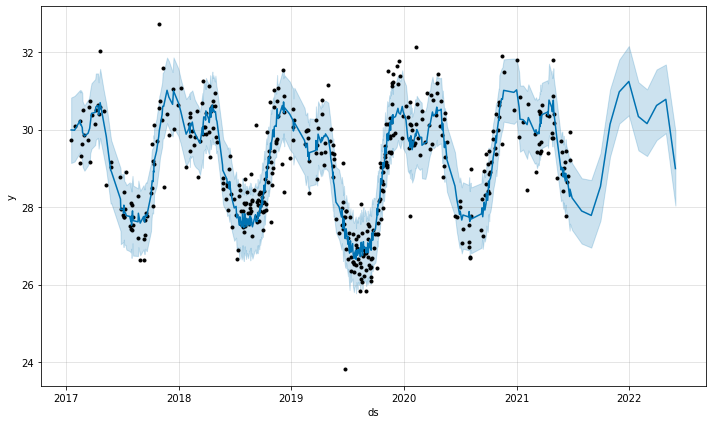

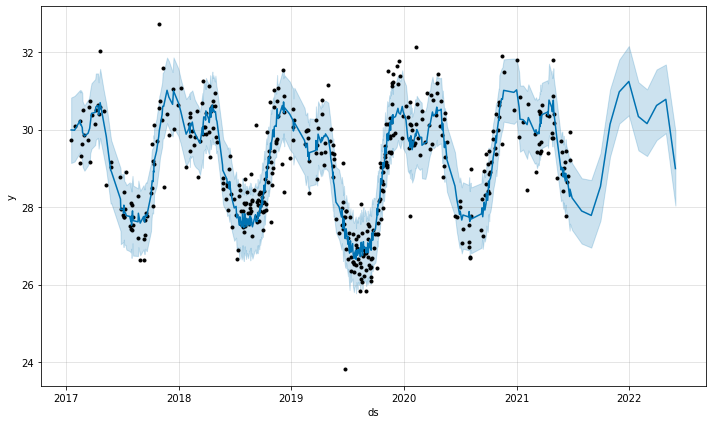

In [ ]:
# Plot Predictions
model.plot(prediction)

Narrative:
+ A Trending data
+ Black dots : the actual data points in dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

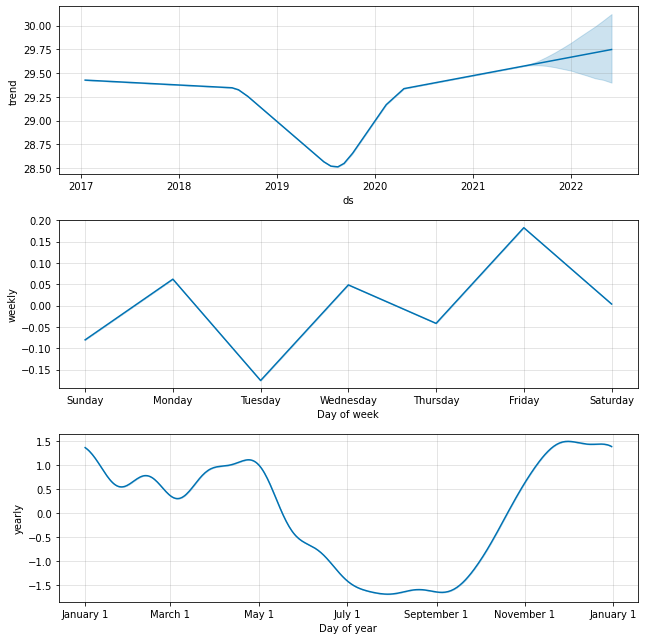

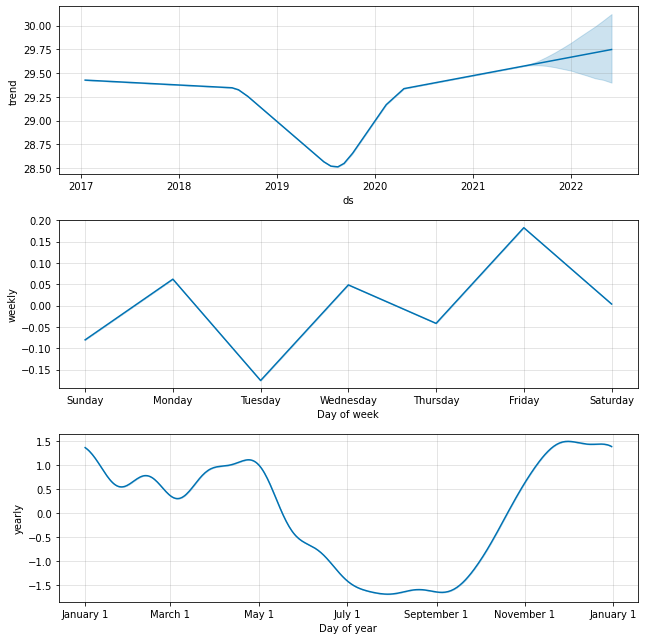

In [ ]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

# Cross Validation
+ For measuring forecast error by comparing the predicted values with the actual values
+ initial: the size of the initial training period
+ period: the spacing between cutoff dates
+ horizon: the forecast horizon(ds minus cutoff)
+  By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [ ]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [ ]:
spl.shape

(451, 2)

In [ ]:
cv = cross_validation(model,initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 3 forecasts with cutoffs between 2019-06-29 00:00:00 and 2020-06-23 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-07-04,27.173416,26.318902,27.997273,26.65,2019-06-29
1,2019-07-05,27.331864,26.498998,28.198144,27.21,2019-06-29
2,2019-07-06,27.150580,26.196204,27.975197,27.34,2019-06-29
3,2019-07-09,27.027580,26.140705,27.858974,26.90,2019-06-29
4,2019-07-12,27.429764,26.550343,28.305006,27.73,2019-06-29


# Performance Metrics


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_pm = performance_metrics(cv)

In [ ]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,32 days,0.381993,0.618056,0.485735,0.017555,0.014402,0.827586
1,33 days,0.389851,0.624381,0.495551,0.017886,0.016425,0.827586
2,35 days,0.382814,0.618719,0.486617,0.017547,0.014402,0.827586
3,36 days,0.400751,0.633049,0.507678,0.018312,0.016425,0.827586
4,37 days,0.415826,0.644846,0.526316,0.019017,0.016844,0.827586
...,...,...,...,...,...,...,...
202,358 days,1.933561,1.390525,1.237266,0.042119,0.035178,0.413793
203,359 days,1.938796,1.392406,1.240575,0.042304,0.035178,0.396552
204,363 days,2.022855,1.422271,1.269588,0.043254,0.040314,0.379310
205,364 days,1.968118,1.402896,1.247934,0.042544,0.040314,0.396552


Visualizing Performance Metrics
+ cutoff: how far into the future the prediction was

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

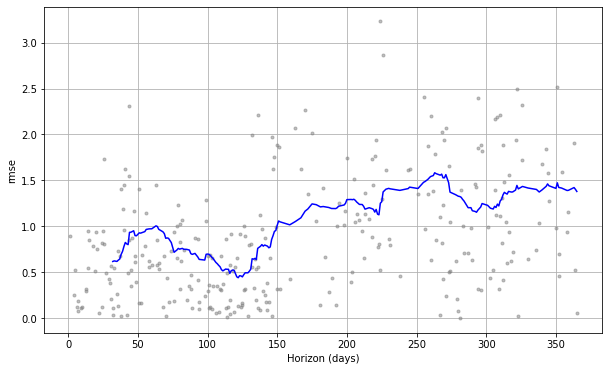

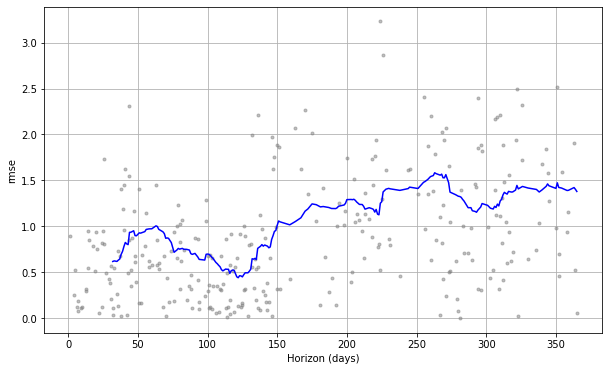

In [ ]:
plot_cross_validation_metric(cv,metric='rmse')

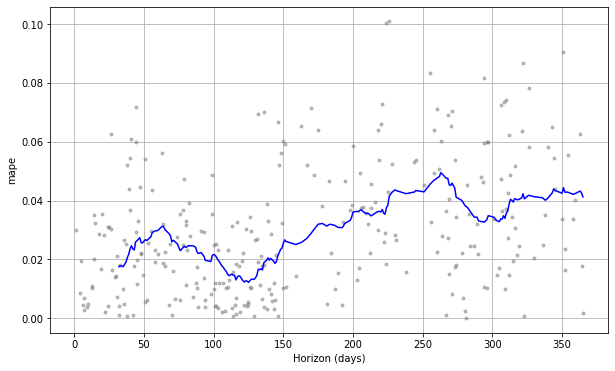

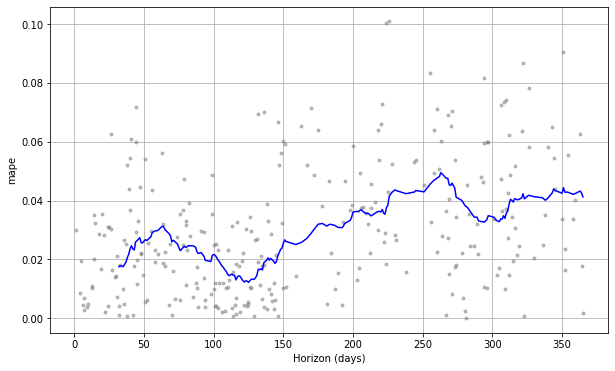

In [ ]:
plot_cross_validation_metric(cv,metric='mape')

# Export Model

In [ ]:
lwith open('/content/drive/MyDrive/saved_model.pkl', "wb") as f:
    pickle.dump(model, f)

In [ ]:
del model

In [ ]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

# Deploy Model to Production